<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/Fuzzy_Cmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=7f90dd8525da6cf250695e1a9f9c92bb062cb4230a182faa7ec0a31806f73d58
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import warnings
warnings.filterwarnings('ignore')

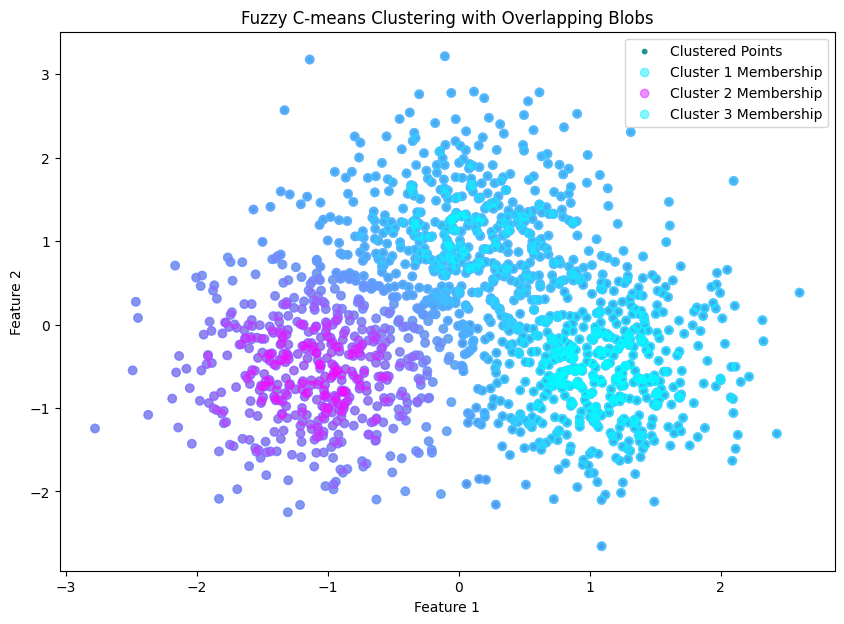

Examples of membership values for the first 10 data points:
[[0.07293626 0.22182614 0.08387427 0.00593694 0.04118469 0.03713777
  0.12409427 0.89408999 0.05316026 0.01123576]
 [0.85727783 0.11862837 0.08881574 0.98768779 0.07027895 0.04202234
  0.62030968 0.054115   0.90509306 0.97920183]
 [0.0697859  0.65954549 0.82730999 0.00637527 0.88853636 0.92083989
  0.25559605 0.05179501 0.04174669 0.0095624 ]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt

centers = [[1, 1], [5, 5], [9, 1]]
cluster_std = [2.0, 2.0, 2.0]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=cluster_std, random_state=42)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)
membership_strength = u

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_membership, cmap='viridis', s=10, label='Clustered Points')

for j in range(3):
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=membership_strength[j], cmap='cool', alpha=0.5, label=f'Cluster {j+1} Membership')

plt.title('Fuzzy C-means Clustering with Overlapping Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("Examples of membership values for the first 10 data points:")
print(membership_strength[:, :10])
